### 사전 준비

In [1]:
# 기본적인 패키지 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 / 차트 마이너스
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='NanumSquare')
sns.set(font='NanumSquare', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지
import statsmodels.api as sm
import sklearn as sk

### 전체 데이터 로드

농어 길이, 무게 56개 샘플

In [4]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

#### 농어의 길이와 무게간의 상관관계 확인

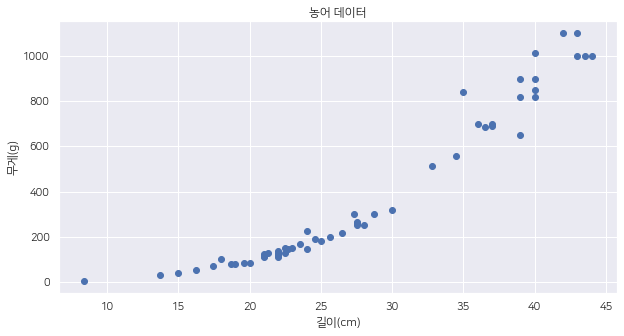

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(x=perch_length, y=perch_weight)

plt.title('농어 데이터')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')

plt.show()

#### 훈련세트와 테스트세트 분리

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [8]:
# 훈련세트는 2차원 배열이어야 하는데 1차원 배열임 -> 수정 필요
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [9]:
# 여기서 column_stack은 우리가 원하는 형태가 아니다
temp = np.column_stack((train_input))
temp

array([[19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
        22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
        36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
        22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5]])

In [10]:
temp.shape

(1, 42)

In [11]:
# 2차원으로 형태변환 - 첫 번째 방법
train_input.reshape(-1,1)

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [12]:
# 2차원으로 형태변환 - 두 번째 방법
new_train_input = np.row_stack((train_input))
new_train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [41]:
new_train_input.shape

(42, 1)

In [42]:
new_test_input = np.row_stack((test_input))
new_test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [43]:
new_test_input.shape

(14, 1)

### 결정계수($R^2$)
- Tex문법

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
knr = KNeighborsRegressor()
# KNN 훈련
knr.fit(X=new_train_input, y=train_target)
# 반드시 X는 2차원 배열이 되어야 한다 -> train_input 대신 new_train_input 사용

KNeighborsRegressor()

In [53]:
# 테스트시에도 X는 2차원 배열이 되어야 한다 -> 여기서도 new로 작업
knr.score(X=new_test_input, y=test_target)
# 결정계수(정확도) = 0.9928

0.992809406101064

### MAE
Mean Absolute Error

In [54]:
from sklearn.metrics import mean_absolute_error

# 테스트세트에 대한 예측을 만든다
test_pred = knr.predict(new_test_input)  # 2차원 배열 사용

In [56]:
# 실제 테스트할 농어의 길이 리스트
new_test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [57]:
# 실제 측정된 농어의 무게세트
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [58]:
# 예측된 무게세트
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [59]:
# 테스트 타겟세트에 대한 평균 절대값 오차(MAE)를 계산
mae = mean_absolute_error(y_true=test_target, y_pred=test_pred)
mae

19.157142857142862

결과에서 예측이 평균적으로 19.15g 정도 타겟값과 다르게 예측되었다

#### 과소적합(underfitting)

- 훈련세트보다 테스트세트의 테스팅결과(결정계수) 값이 더 좋을 경우
- 훈련세트와 테스트세트의 결정계수 값이 모두 낮은 경우

In [61]:
# 테스트시에도 X는 2차원 배열이 되어야 한다 -> 여기서도 new로 작업
knr.score(X=new_test_input, y=test_target)

0.992809406101064

In [60]:
# 테스트로 결정계수
knr.score(X=new_train_input, y=train_target)

0.9698823289099254

#### 과대적합(overfitting)
- 훈련세트로 나온 결정계수는 매우 좋지만 테스트세트에서 나온 결정계수가 매우 나쁠 때

### 현재의 과소적합 문제를 해결할 방법

모델을 조금 더 복잡하게 만들면 된다 -> n_neighbors 기본 5개에서 더 줄인다

In [62]:
# 최근접 이웃의 갯수를 5에서 3으로 줄임
knr.n_neighbors = 3

# 재훈련
knr.fit(X=new_train_input, y=train_target)
knr.score(X=new_test_input, y=test_target)

0.9746459963987609

In [64]:
knr.score(X=new_train_input, y=train_target)
# 과소적합 문제를 해결함!

0.9804899950518966

#### 확인문제

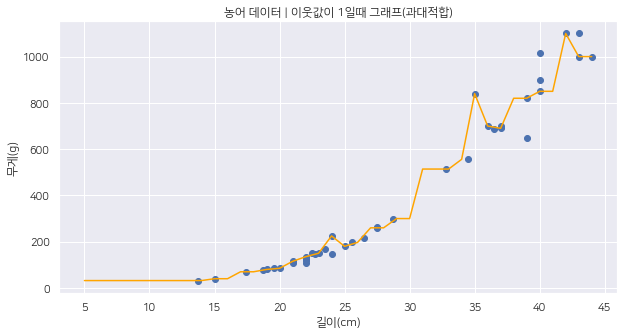

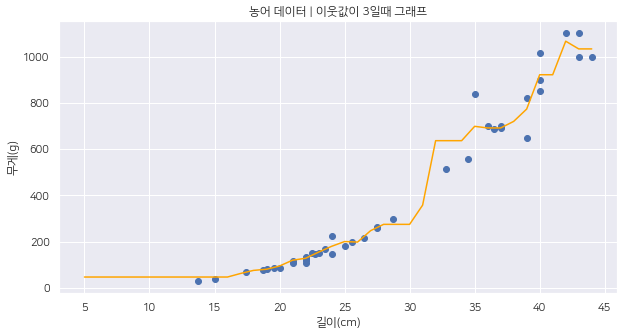

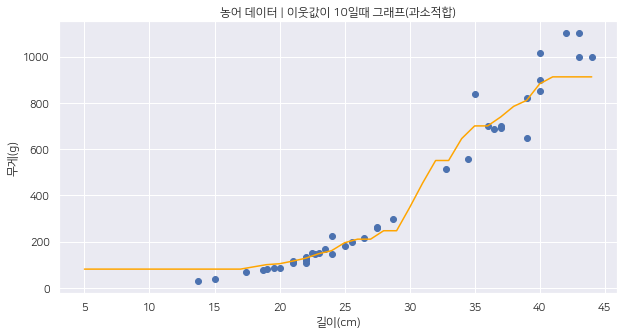

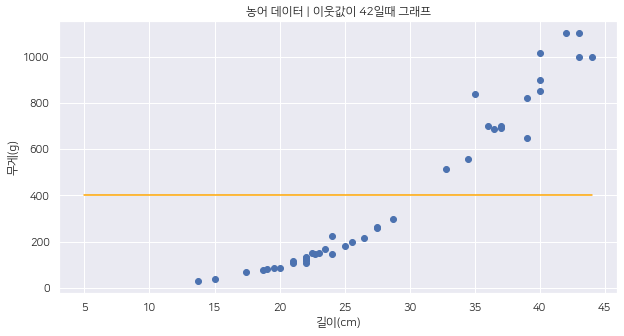

In [76]:
# KNN 회귀 객체를 만든다
knr = KNeighborsRegressor()

# 5~45까지 x좌표를 생성
x = np.arange(5,45).reshape(-1,1)

# k-이웃값을 변경하면서 예측하고 차트 그리기
for n in [1, 3, 10, 42]:
    knr.n_neighbors = n
    knr.fit(X=new_train_input, y=train_target)
   
    # x에 대한 예측 도출
    pred = knr.predict(X=x)
   
    # 훈련세트와 예측결과를 산점도에 그린다
    plt.figure(figsize=(10, 5))
    plt.scatter(x=new_train_input, y=train_target)
    plt.plot(x, pred, color='orange')
    
    title = f'농어 데이터 | 이웃값이 {n}일때 그래프'
    if n == 1:
        title += '(과대적합)'
    elif n == 10:
        title += '(과소적합)'
    plt.title(title)
    
    plt.xlabel('길이(cm)')
    plt.ylabel('무게(g)')
    plt.show()